## Ad Click Prediction

Reference: https://stackabuse.com/predicting-customer-ad-clicks-via-machine-learning/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('advertising.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
data.info()
# 1000 samples, there are no null values.
# Ad Topic Line, City, Country, Timestamp are nonnumeric values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
data.describe()
# statistics on numerical value columns

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


/Users/sophiechoe/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/sophiechoe/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


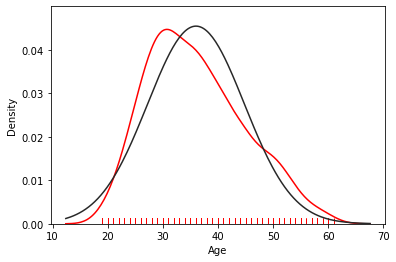

In [7]:
from scipy.stats import norm
sns.distplot(data['Age'], hist=False, color='r', rug=True, fit=norm);

# The age features show that most of the users are around 30.

/Users/sophiechoe/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sophiechoe/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2112: FutureWarning: Using `vertical=True` to control the orientation of the plot  is deprecated. Instead, assign the data directly to `y`. 
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Daily Time Spent on Site'>

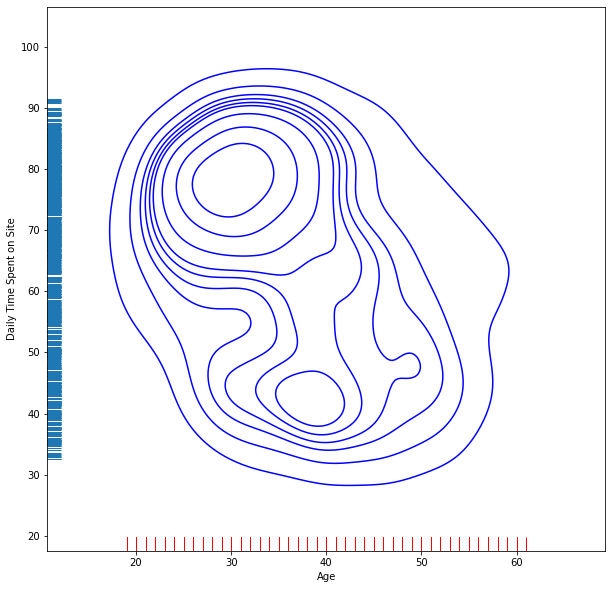

In [8]:
f, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(data.Age, data['Daily Time Spent on Site'], color="b", ax=ax)
sns.rugplot(data.Age, color="r", ax=ax)
sns.rugplot(data['Daily Time Spent on Site'], vertical=True, ax=ax)

# People in the 30 age group spend most of time on the site

/Users/sophiechoe/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


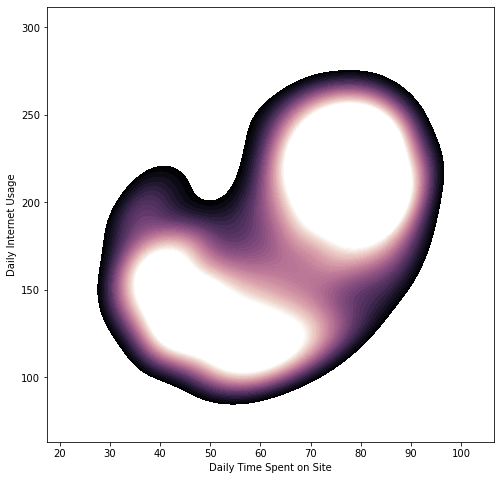

In [10]:
f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.cubehelix_palette(as_cmap=True, start=0, dark=0, light=3, reverse=True)
sns.kdeplot(data["Daily Time Spent on Site"], data['Daily Internet Usage'],
    cmap=cmap, n_levels=100, shade=True);

# People who spend more time on the internet tend to spend more time on the site. It seems the site is a general popular site.

array([[<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Daily Time Spent on Site'>,
        <AxesSubplot:xlabel='Age', ylabel='Daily Time Spent on Site'>,
        <AxesSubplot:xlabel='Area Income', ylabel='Daily Time Spent on Site'>,
        <AxesSubplot:xlabel='Daily Internet Usage', ylabel='Daily Time Spent on Site'>],
       [<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Area Income', ylabel='Age'>,
        <AxesSubplot:xlabel='Daily Internet Usage', ylabel='Age'>],
       [<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Area Income'>,
        <AxesSubplot:xlabel='Age', ylabel='Area Income'>,
        <AxesSubplot:xlabel='Area Income', ylabel='Area Income'>,
        <AxesSubplot:xlabel='Daily Internet Usage', ylabel='Area Income'>],
       [<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Daily Internet Usage'>,
        <AxesSubplot:xlabel='Age', ylabel='Daily Intern

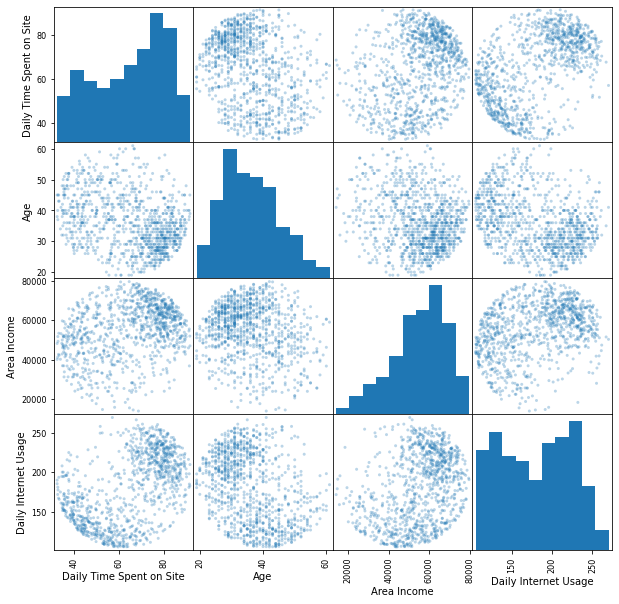

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['Daily Time Spent on Site', 'Age','Area Income', 'Daily Internet Usage']],
    alpha=0.3, figsize=(10,10))

# Income seems to be around $70K, age around 24, ...

In [10]:
object_variables = ['Ad Topic Line', 'City', 'Country']
data[object_variables].describe(include=['O'])
# Ad topic line, city, and country all seem to be spread.

,Ad Topic Line,City,Country
count,1000,1000,1000
unique,1000,969,237
top,Cloned 5thgeneration orchestration,Lisamouth,France
freq,1,3,9


In [11]:
pd.crosstab(index=data['Country'], columns='count').sort_values(['count'], ascending=False).head(20)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


In [12]:
data = data.drop(['Ad Topic Line', 'City', 'Country'], axis=1)
# Ad Topic Line, City, and Country seem not to be important features, hence we drop them.

In [11]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

data['Month'] = data['Timestamp'].dt.month
data['Day of the month'] = data['Timestamp'].dt.day
data["Day of the week"] = data['Timestamp'].dt.dayofweek
data['Hour'] = data['Timestamp'].dt.hour
data = data.drop(['Timestamp'], axis=1)

data.head()

# We split time stamp into four features: Month, Day of the month, Day of the week, and hour

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month,Day of the month,Day of the week,Hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,27,6,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,4,0,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,13,6,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,1,10,6,2
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,6,3,4,3


/Users/sophiechoe/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sophiechoe/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2112: FutureWarning: Using `vertical=True` to control the orientation of the plot  is deprecated. Instead, assign the data directly to `y`. 
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hour', ylabel='Day of the week'>

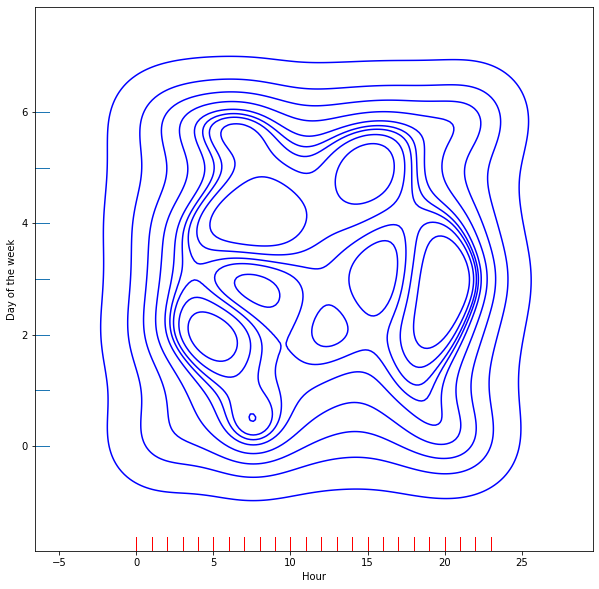

In [14]:
f, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(data.Hour, data['Day of the week'], color="b", ax=ax)
sns.rugplot(data.Hour, color="r", ax=ax)
sns.rugplot(data['Day of the week'], vertical=True, ax=ax)

# Maybe on Wednesday, people tend to visit the site later in the day, around 8 PM.

In [15]:
from sklearn.model_selection import train_test_split

X = data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage',
    'Male', 'Month', 'Day of the month' ,'Day of the week']]
y = data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Based on the features 'Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage','Male', 
# 'Month', 'Day of the month' ,'Day of the week', we want to see their ad click ratio

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [30]:
from sklearn.naive_bayes import GaussianNB

modelGNB = GaussianNB()
modelGNB.fit(X_train, y_train)
predictions_LR = modelGNB.predict(X_test)

print('Logistic regression accuracy:', accuracy_score(predictions_LR, y_test))
print('')
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions_LR))

Logistic regression accuracy: 0.9606060606060606

Confusion matrix:
[[156   6]
 [  7 161]]


In [23]:
from sklearn.svm import SVC

SVC(gamma=2, C=1)
modelSVC = SVC(kernel="linear", C=0.025)
modelSVC.fit(X_train, y_train)
predictions_LR = modelSVC.predict(X_test)

print('Logistic regression accuracy:', accuracy_score(predictions_LR, y_test))
print('')
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions_LR))

Logistic regression accuracy: 0.9575757575757575

Confusion matrix:
[[158   4]
 [ 10 158]]


In [31]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

modelQD = QuadraticDiscriminantAnalysis()
modelQD.fit(X_train, y_train)
predictions_LR = modelQD.predict(X_test)

print('Logistic regression accuracy:', accuracy_score(predictions_LR, y_test))
print('')
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions_LR))

Logistic regression accuracy: 0.9575757575757575

Confusion matrix:
[[155   7]
 [  7 161]]


In [29]:
from sklearn.ensemble import AdaBoostClassifier

modelAB = AdaBoostClassifier()
modelAB.fit(X_train, y_train)
predictions_LR = modelAB.predict(X_test)

print('Logistic regression accuracy:', accuracy_score(predictions_LR, y_test))
print('')
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions_LR))

Logistic regression accuracy: 0.9454545454545454

Confusion matrix:
[[157   5]
 [ 13 155]]


In [20]:
# using Decision Tree

from sklearn.tree import DecisionTreeClassifier

model_2 = DecisionTreeClassifier()
model_2.fit(X_train, y_train)
predictions_DT = model_2.predict(X_test)

print('Decision tree accuracy:', accuracy_score(predictions_DT, y_test))
print('')
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions_DT))

Decision tree accuracy: 0.9363636363636364

Confusion matrix:
[[152  10]
 [ 11 157]]


In [26]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
modelRF.fit(X_train, y_train)
predictions_LR = modelRF.predict(X_test)

print('Logistic regression accuracy:', accuracy_score(predictions_LR, y_test))
print('')
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions_LR))

Logistic regression accuracy: 0.9333333333333333

Confusion matrix:
[[158   4]
 [ 18 150]]


In [18]:
# Using logistic regression

from sklearn.linear_model import LogisticRegression

model_1 = LogisticRegression(solver='lbfgs')
model_1.fit(X_train, y_train)
predictions_LR = model_1.predict(X_test)

print('Logistic regression accuracy:', accuracy_score(predictions_LR, y_test))
print('')
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions_LR))


Logistic regression accuracy: 0.906060606060606

Confusion matrix:
[[158   4]
 [ 27 141]]


In [21]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier(3)
modelKNN.fit(X_train, y_train)
predictions_LR = modelKNN.predict(X_test)

print('Logistic regression accuracy:', accuracy_score(predictions_LR, y_test))
print('')
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions_LR))

Logistic regression accuracy: 0.7090909090909091

Confusion matrix:
[[124  38]
 [ 58 110]]


In [25]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

modelGP = GaussianProcessClassifier(1.0 * RBF(1.0))
modelGP.fit(X_train, y_train)
predictions_LR = modelGP.predict(X_test)

print('Logistic regression accuracy:', accuracy_score(predictions_LR, y_test))
print('')
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions_LR))

Logistic regression accuracy: 0.5757575757575758

Confusion matrix:
[[161   1]
 [139  29]]


In [35]:
from sklearn.svm import SVC

modelSV = SVC(gamma=2, C=1)
modelSV.fit(X_train, y_train)
predictions_LR = modelSV.predict(X_test)

print('Logistic regression accuracy:', accuracy_score(predictions_LR, y_test))
print('')
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions_LR))

Logistic regression accuracy: 0.4909090909090909

Confusion matrix:
[[162   0]
 [168   0]]


In [22]:
from sklearn.neural_network import MLPClassifier

modelMLP = MLPClassifier(alpha=1, max_iter=1000)
modelMLP.fit(X_train, y_train)
predictions_LR = modelMLP.predict(X_test)

print('Logistic regression accuracy:', accuracy_score(predictions_LR, y_test))
print('')
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions_LR))

Logistic regression accuracy: 0.48787878787878786

Confusion matrix:
[[ 16 146]
 [ 23 145]]
